 <font face = 'Times New Roman'> <font color = 'PeachPuff'>
 # --- _**Fashion Dataset**_ ---

In [1]:
# libraries.
import tensorflow as tf
import numpy as np
from tensorflow import keras   # Keras is a library that allows to build neural nets
import matplotlib.pyplot as plt   # To display images

 <font face = 'Times New Roman'> <font color = 'PeachPuff'>
Keras Fashion Documentation:

<img src='Keras _Fashion _Documentation_Table.png'  width = '500'>

        https://keras.io/api/datasets/fashion_mnist/

 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
### **Tensor Flow Coding**

 <font face = 'Times New Roman'> <font color = 'PeachPuff'> The dataset has 70k data (images of different type of clothing) and we are going to use  60k for training and 10k for testing.

 <font face = 'Times New Roman'><font color = 'PeachPuff'> **1)  Import data :**
 
  Load a pre-defined (fashion) MNIST dataset (70000 of 28x28).

In [2]:
# 1. IMPORT DATA : Load a pre-defined (fashion) MNIST dataset (70000 of 28x28).
fashion_mnist = keras.datasets.fashion_mnist   # We call keras documentation.
# This is data that is already labeled.

 <font face = 'Times New Roman'><font color = 'PeachPuff'> **2) Pull out data from the Dataset:**

In [3]:
# 2. Pull out data from the Dataset:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Returns: 60000 of the images for training and 10000 of the images for testing.

# x_train or train_images: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
# y_train or train_labels: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.
# x_test or test_images: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
# y_test or test_labels: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

 <font face = 'Times New Roman'><font color = 'PeachPuff'> **3) Show Data:**

Train Label = 9


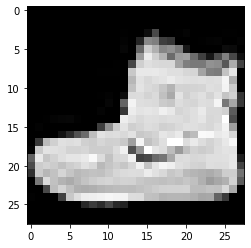

In [9]:
# 3. Show Data:
print('Train Label =', train_labels[0])   # Display the first image from de dataset / element from the training images.
#print(train_images[0])
plt.imshow(train_images[0], cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
**4) Designing Our Neural Net:**

In [5]:
# 4. Create a Neural Net for it 

    # 4.1 Define our neural net structure 
model = keras.Sequential([
    
    # The input is a 28x28 image, therefore, we "flatten" the 28x28 image into a single layer == it means a 784x1 input layer:
    keras.layers.Flatten(input_shape = (28,28)),  # We do this to simplify the structure of the neural net
    # THIS IS JUST AN IMAGE (THE INPUT)
    
    # The hidden layer is 128 deep.
    keras.layers.Dense(units = 128, activation = tf.nn.relu),  # Relu returns the value, or 0 (works good enough. This makes neural nets so much faster and still get pretty good accuracy)
    # THIS CAPTURES THE PATTERN OF WHAT A SHOE IS (for example)
    # THIS IS FILTERED BY ALL THE HIDDEN LAYERS
    # The 'relu' gets rid of the negative numbers (turning them into zero) and leaving the positive ones
    # For more hidden layers (if you want to add more than one), it is needed to duplicate or put more of this hidden layer line code and the number of nodes can vary
    
    # The output is a series of numbers from 0 to 9 which are the probabilities (depending on what piece of clothing it is)
    # And this returns the maximun (number) probability.   [From the documentation]
    keras.layers.Dense(units = 10, activation = tf.nn.softmax)  # Dense means that every note is conected to any other note in each column (neural net)
    # THIS HAS THE 10 LABELS AND IS GOING TO TELL HOW MUCH THE NEURAL NETWORK BELIEVES IS GOING TO BE A SHOE, A T-SHIRT, OR SOMETHING ELSE
    # units are the elements/nodes/neurons of the layer
    # The 'sofmax' picks the greatest number out of everything (the higest probalility) => Convert the maximum value to 1 and the rest to 0.
    
    
    ])    # Sequential means vertical column layers

 # The activation function is a filter mecanism of each layer that filter all the data

 # We have to make sure the first layer y compatible with the input  -  (28,28) image

## Notes:
# - Remember: Matrix = (rows x columns)   =>   We are working with a multidimesional array
# - There are numbers from 0-255 (0 is the first number) because 2^8 = 256 what means a bit   ==  Bit image in black and white 
# - In a neural net we have an input or first layer (the images or data), a hidden layer (trained data or deep learning) and an output layer (the probabilities)
# - Why do we need multiple hidden layer in neural network?
    # R/= Basically, by adding more hidden layers / more neurons per layer you add more parameters to the model. Hence you allow the model to fit more complex functions
    # R/= These layers are the key component that enables a neural network to learn complex tasks and achieve excellent performance.
    # Big number of Hidden Layers == Deep Learning

<img src='Dense_neural_network.png'  width = '500'> 

                    Dense Neural Network

<img src='Neural_Network _Design.png'  width = '500'> 

                    Our Neural Network Design

 <font face = 'Times New Roman'> <font color = 'PeachPuff'>  Each node/neuron is a pixel (in the input layer) and each line represents a weight, and according to it, it goes for each relation in the hidden layer. According to the patterns this represents a function and eventuallly split out the correct numbers (output layer).

 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
**5) Prepatation of the Neural Network to be Trained:**

In [43]:
# Compile our model => After creating a model, you need to compile it
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# The 'loss' function will tell us how correct or how incorrect we are
# The 'optimizer' function makes the changes to the weights so it can be more accurate (to the clothes)
# The 'accuracy' function will tell us the accuracy of the model
# This functions are really good at images, but there are more functions (Adam and sparse_categorical_crossentropy)

 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
**6) Training Our Model:**


Let's use our training data (60k data). We use the `fit` function.

In [46]:
model.fit(train_images, train_labels, epochs=5)
# epochs=5 means that we are adjusting all the neural network weights five times
# 5 is really good in this case because the images are small



Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4634 - accuracy: 0.8394
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4651 - accuracy: 0.8387
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4592 - accuracy: 0.8426
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4610 - accuracy: 0.8393
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4561 - accuracy: 0.8436


 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
**7) Testing Our Model:**

In [49]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.8274


 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
**8) Make Predictions:**

In [19]:
predictions = model.predict(test_images)
# We take the 10k test images and we use our model to predict each of this images and we compare them with the true labels

 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
Let's see the test dataset:

True Label = 9


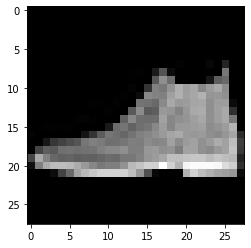

In [42]:
print('True Label =', test_labels[0])   # Display the first image from de dataset / element from the testing images.
plt.imshow(test_images[0], cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
Let's see what we predict:

In [21]:
predictions[0]

array([2.0967333e-26, 5.8229524e-19, 0.0000000e+00, 8.7033426e-22,
       0.0000000e+00, 3.9580125e-02, 0.0000000e+00, 3.4456220e-02,
       9.3101785e-16, 9.2596358e-01], dtype=float32)

 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
This is the probablilty of every possibe output or label, and as we can see, the prediction says that the element [0] is more likely to be a shoe since [9] (label in the array) it is the greatest number.

In [41]:
# Let's make it look good:
print('The prediction says the lable is: ', list(predictions[0]).index(max(predictions[0])))

# This prints the label that corresponds to that cloth type == The [9] element of the array

The prediction says the lable is:  9


 <font face = 'Times New Roman'> <font color = 'PeachPuff'> 
Let's try it for another clothes:

True Label = 2


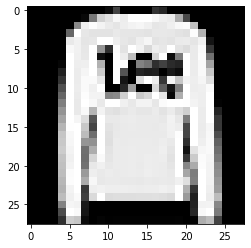

In [37]:
print('True Label =', test_labels[1])   # Display the first image from de dataset / element from the testing images.
plt.imshow(test_images[1], cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In [38]:
predictions[1]

array([1.77488560e-04, 9.41856282e-09, 9.78584111e-01, 5.78805157e-05,
       4.49381908e-03, 5.61307270e-36, 1.66866947e-02, 0.00000000e+00,
       1.10516554e-10, 0.00000000e+00], dtype=float32)

In [40]:
print('The prediction says the lable is: ', list(predictions[1]).index(max(predictions[1])))

The prediction says the lable is:  2


In [2]:
print('Keep Programming')

Keep Programming
